## Housing Market Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import joblib

In [2]:
# Unzipping the file
with zipfile.ZipFile('Housing_price.zip', 'r') as zip_ref:
    zip_ref.extractall('Housing_price')

# Get list of all files in the extracted folder
file_list = os.listdir('Housing_price')

# Load the first CSV file into a DataFrame
csv_file = [file for file in file_list if file.endswith('.csv')][0]
df = pd.read_csv(f'Housing_price/{csv_file}')

# Display the first few rows to inspect the data
print(df.head())

#  Initial Data Exploration
# Check the basic information and data types of each column
print("\nData Types and Non-Null Counts:\n")
print(df.info())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# View basic statistics of numerical columns
print("\nSummary Statistics for Numerical Columns:\n")
print(df.describe())

# Display unique values in categorical columns
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicates)}")

   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065

Data Types and Non-Null Counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB
None

Mi

In [3]:
#  Initial Data Exploration
# Check the basic information and data types of each column
print("\nData Types and Non-Null Counts:\n")
print(df.info())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# View basic statistics of numerical columns
print("\nSummary Statistics for Numerical Columns:\n")
print(df.describe())

# Display unique values in categorical columns
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicates)}")

# Check if any rows are duplicated based on an identifier (if there is one like 'House ID' or similar)
if 'House ID' in df.columns:
    house_id_duplicates = df[df['House ID'].duplicated()]
    print(f"\nNumber of duplicate House IDs: {len(house_id_duplicates)}")


Data Types and Non-Null Counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB
None

Missing Values:

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

Summary Statistics for Numerical Columns:

         SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151
std      575.513241      1.116326


Number of rows after removing negative prices: 49978


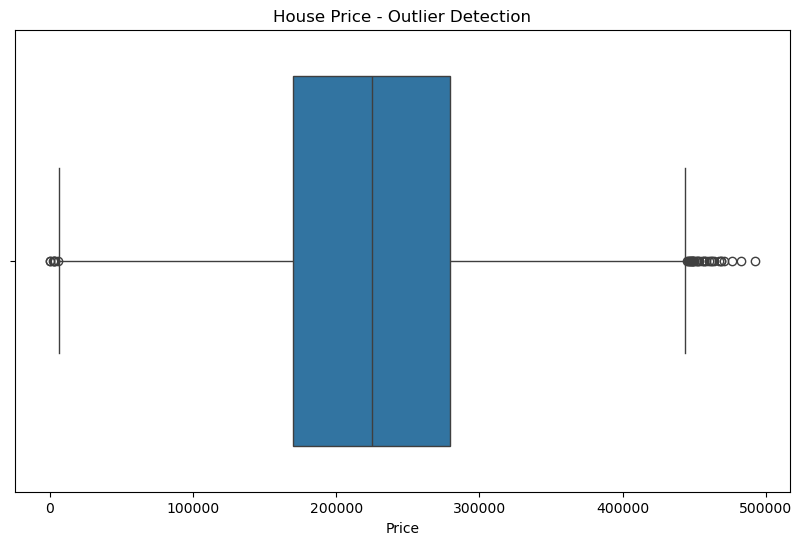

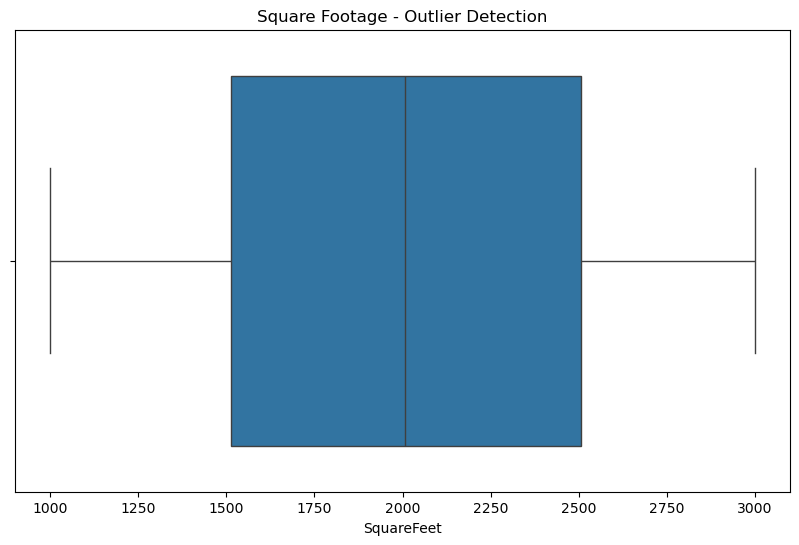

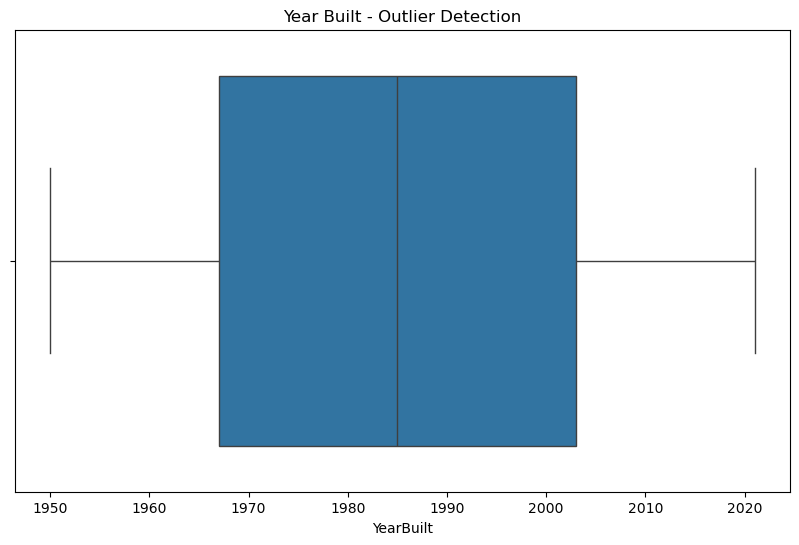

In [4]:
# Clean Data

# Filter out rows where 'Price' is negative
df = df[df['Price'] > 0]
print(f"\nNumber of rows after removing negative prices: {len(df)}")

# Check for Outliers

# Boxplot to detect outliers in 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('House Price - Outlier Detection')
plt.show()

# Boxplot to detect outliers in 'SquareFeet'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SquareFeet'])
plt.title('Square Footage - Outlier Detection')
plt.show()

# Boxplot to detect outliers in 'YearBuilt'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['YearBuilt'])
plt.title('Year Built - Outlier Detection')
plt.show()

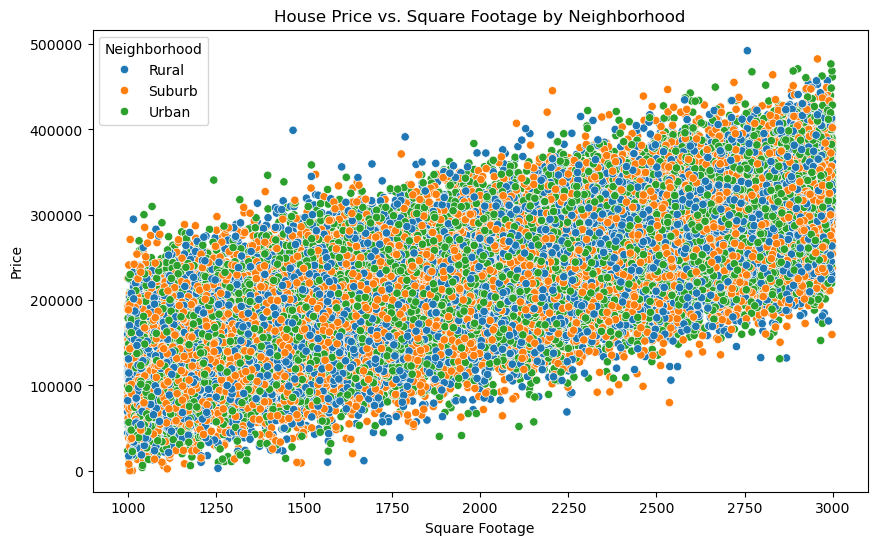

C:\Users\milto\AppData\Local\Temp\ipykernel_18380\411680587.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Neighborhood', y='Price', data=avg_price_neighborhood, palette='viridis')


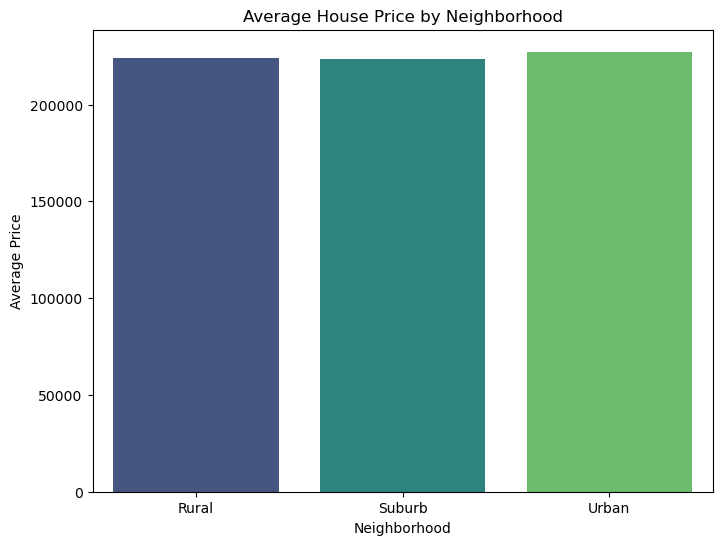

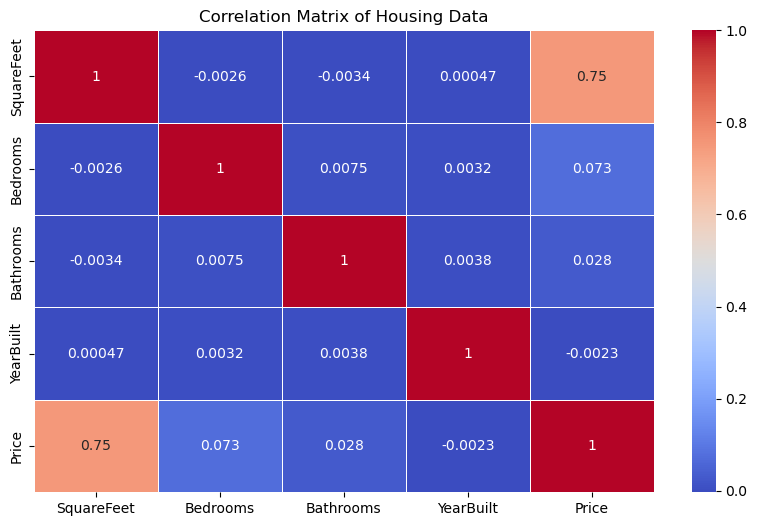

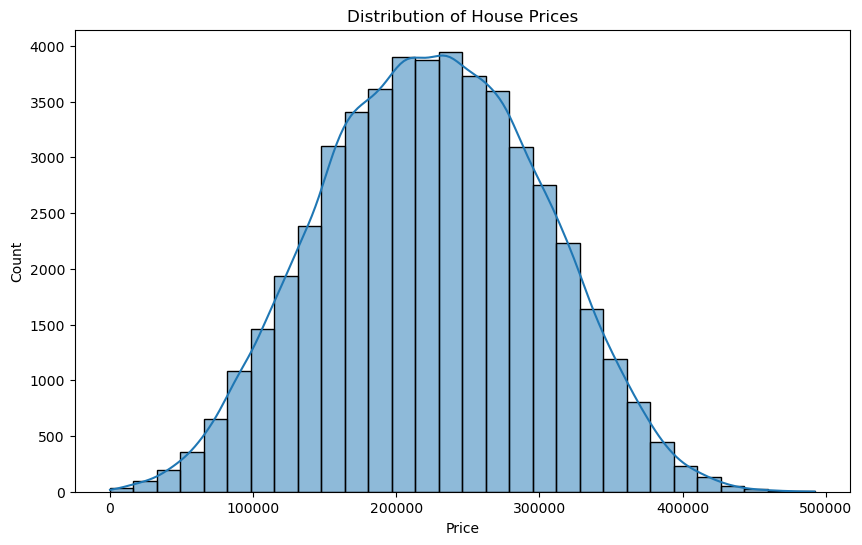

In [5]:
# EDA and Visualizations

plt.figure(figsize=(10, 6))
sns.scatterplot(x='SquareFeet', y='Price', hue='Neighborhood', data=df)
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('House Price vs. Square Footage by Neighborhood')
plt.show()

avg_price_neighborhood = df.groupby('Neighborhood')['Price'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Neighborhood', y='Price', data=avg_price_neighborhood, palette='viridis')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Average House Price by Neighborhood')
plt.show()

# Calculate the correlation matrix for only the numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Housing Data')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.xlabel('Price')
plt.title('Distribution of House Prices')
plt.show()


Linear Regression Model Evaluation:
MAE: 39490.690345017865
MSE: 2444275694.751612
R2: 0.5779866236606085

Decision Tree Regression Model Evaluation:
MAE: 57774.34553914512
MSE: 5181364248.102143
R2: 0.10541800784546873

Random Forest Regression Model Evaluation:
MAE: 41883.592874455484
MSE: 2761068791.8414555
R2: 0.5232911059696375

Cross-validation scores for Linear Regression: [-2.53985770e+09 -2.43866902e+09 -2.44982312e+09 -2.48711829e+09
 -2.49930292e+09]

Cross-validation scores for Decision Tree Regression: [-5.39941748e+09 -5.23636422e+09 -5.26035532e+09 -5.26355534e+09
 -5.31579482e+09]

Cross-validation scores for Random Forest Regression: [-2.84599123e+09 -2.77810154e+09 -2.77486668e+09 -2.80589360e+09
 -2.82257589e+09]


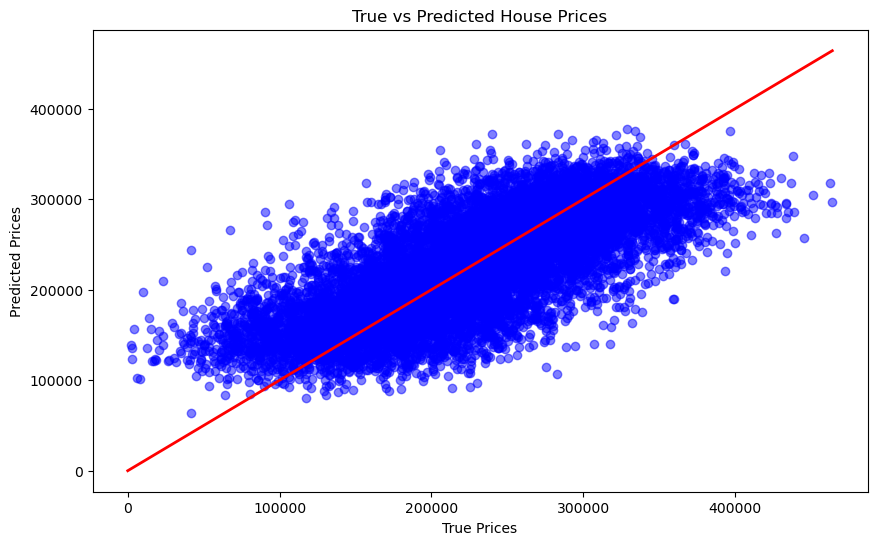

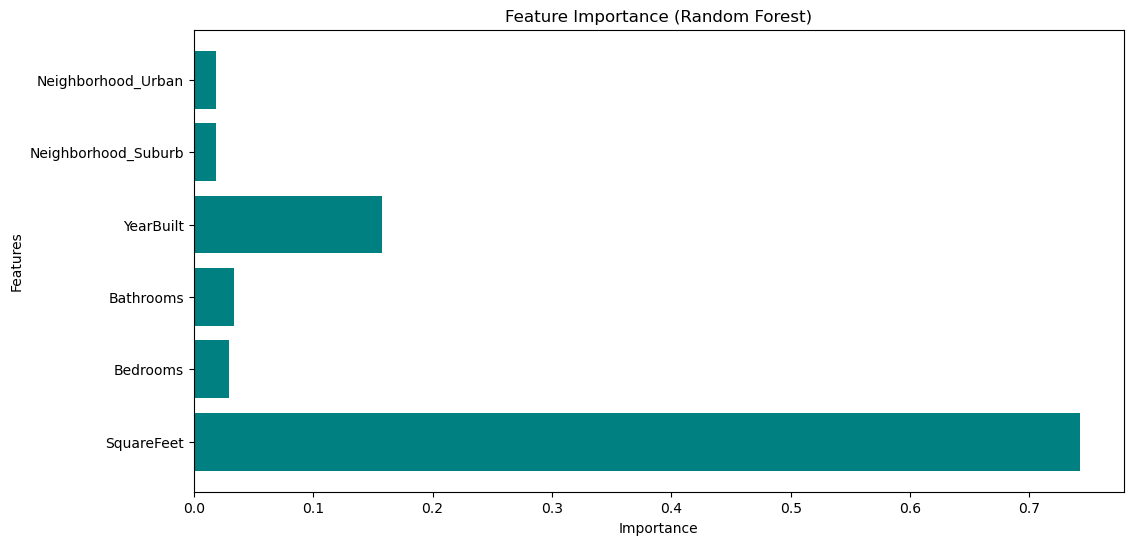

In [6]:
# Data Preprocessing

# Convert categorical 'Neighborhood' into numerical format using one-hot encoding
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)

# Split the data into features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Feature Scaling (if necessary)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train different regression models

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and evaluation for Linear Regression
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Model Evaluation:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"R2: {r2_lr}")

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation for Decision Tree Regression
y_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regression Model Evaluation:")
print(f"MAE: {mae_dt}")
print(f"MSE: {mse_dt}")
print(f"R2: {r2_dt}")

# 4.3 Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation for Random Forest Regression
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Model Evaluation:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R2: {r2_rf}")

# Cross-validation for the models (optional, for better performance insight)
cv_scores_lr = cross_val_score(lr_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_dt = cross_val_score(dt_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_rf = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

print("\nCross-validation scores for Linear Regression:", cv_scores_lr)
print("\nCross-validation scores for Decision Tree Regression:", cv_scores_dt)
print("\nCross-validation scores for Random Forest Regression:", cv_scores_rf)

# Visualize Results

# Visualizing the comparison of true vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linewidth=2)  # Ideal line (True vs Predicted)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted House Prices')
plt.show()

# Feature importance (Random Forest)
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(12, 6))
plt.barh(X.columns, feature_importance, color='teal')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [11]:
# Save the Model (Optional)
# Save the trained model for future use
joblib.dump(rf_model, 'random_forest_model.pkl')

print("\nRandom Forest Model saved successfully!")


Random Forest Model saved successfully!
